## Step 1: Environment Set Up

In [5]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# load the iris data set
iris = datasets.load_iris()

## Step 2: Examing the Iris data set

In [6]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Step 3: Feature Regression Curves

In [8]:
y = (iris["target"] == 2).astype(np.int)


In [9]:
X = np.empty(shape=(4, 150, 1))
X[0] = iris['data'][:, 0:1].reshape(-1, 1) # sepal length data
X[1] = iris['data'][:, 1:2].reshape(-1, 1) # sepal width data
X[2] = iris['data'][:, 2:3].reshape(-1, 1) # petal length data
X[3] = iris['data'][:, 3:4].reshape(-1, 1) # petal width data

In [10]:
# define logistic regression instances for each feature
log_regs = np.array([\
    LogisticRegression(),\
    LogisticRegression(),\
    LogisticRegression(),\
    LogisticRegression()\
])
# trigger 'leaerning' process for each feature
for i in range(0, X.shape[0]):
    x = X[i]
    log_regs[i].fit(x, y)

In [11]:
X_minmax = np.empty(shape=(4,2))
for i in range(0, X.shape[0]):
    X_minmax[i] = np.array([X[i].min(), X[i].max()])
X_minmax

array([[4.3, 7.9],
       [2. , 4.4],
       [1. , 6.9],
       [0.1, 2.5]])

In [12]:
sample_size = 1000
X_samples = np.empty(shape=(4, 1000, 1))
for i in range(0, X_minmax.shape[0]):
    X_samples[i] = np.linspace(np.floor(X_minmax[i][0]), np.ceil(X_minmax[i][1]), sample_size).reshape(-1, 1)

In [13]:
y_probs = np.empty(shape=(4, 1000, 2))
for i in range(0, log_regs.shape[0]):
    samples = X_samples[i]
    log_reg = log_regs[i]
    y_probs[i] = log_reg.predict_proba(samples)

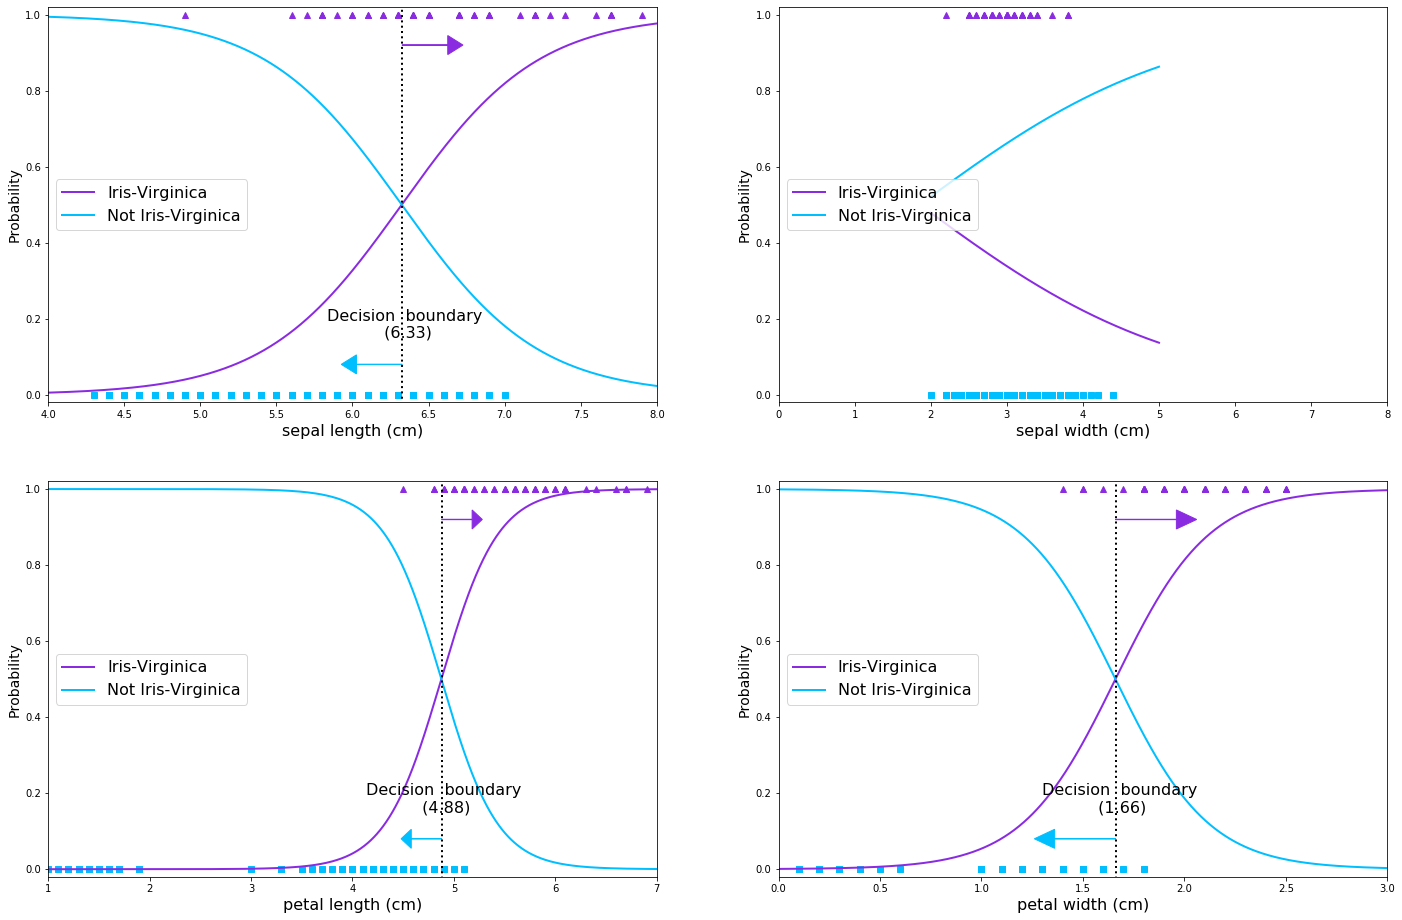

In [14]:
plt.figure(figsize=(24, 16))

y_test = (iris["target"] == 2).astype(np.int)

for i in range(0, len(iris['feature_names'])):
    boundary_samples = X_samples[i][y_probs[i][:, 1] >= 0.5]
    decision_boundary = 0
    x_axis_min = np.floor(X_minmax[i][0])
    x_axis_max = np.ceil(X_minmax[i][1])
        
    plt.subplot(2, 2, i+1)
    plt.plot(X[i][y_test==1], y_test[y_test==1], marker='^', color='blueviolet', linestyle='None') # markers for Iris-Virginica
    plt.plot(X[i][y_test==0], y_test[y_test==0], marker="s", color='deepskyBlue', linestyle='None') # markers for NO Iris-Virginica
    plt.plot(X_samples[i], y_probs[i][:, 1], color='blueviolet', linewidth=2, label='Iris-Virginica')
    plt.plot(X_samples[i], y_probs[i][:, 0], 'deepskyblue', linewidth=2, label='Not Iris-Virginica')
    
    # determine if we have a decision boundary available
    if (len(boundary_samples) > 0):
        decision_boundary = boundary_samples[0]
        plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
        plt.text(decision_boundary+0.02, 0.15, 'Decision  boundary\n (%.2f)' % decision_boundary, fontsize=16, color="k", ha="center")
        plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='blueviolet', ec='blueviolet')
        plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='deepskyBlue', ec='deepskyBlue')
    else:
        # no decision boundary available --> align axis to better illustrate that both curves don't intersect
        x_axis_min = 0
        x_axis_max = 8
    
    plt.axis([x_axis_min, x_axis_max, -0.02, 1.02])
    plt.legend(loc='center left', fontsize=16)
    plt.xlabel(iris['feature_names'][i], fontsize=16)
    plt.ylabel('Probability', fontsize=14)

## Performing the actual Regression

In [15]:
y = iris.target
X = np.column_stack((iris.data[:, 0:2], iris.data[:, 3:4]))
X[0:5, :]

array([[5.1, 3.5, 0.2],
       [4.9, 3. , 0.2],
       [4.7, 3.2, 0.2],
       [4.6, 3.1, 0.2],
       [5. , 3.6, 0.2]])

In [16]:
# instantiate the Logistic Regression classifier
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X, y)

# instantiate the Iris Sample [4.8, 2.5, 5.3, 2.4] leaving the 5.3 (sepal width)
iris_sample = np.array([4.8, 2.5, 2.4]).reshape(1, -1)
iris_sample

array([[4.8, 2.5, 2.4]])

In [17]:
iris_sample_probs = log_reg_classifier.predict_proba(iris_sample)
iris_sample_probs

array([[0.00188033, 0.08075145, 0.91736822]])

In [18]:
sample_predicition = log_reg_classifier.predict(iris_sample)
sample_predicition

array([2])

In [19]:
# compare predictions for sepal length, petal length and petal width
# <-- sepal width has no decision boundary, so the sepal width has no evidence in making any decision here
predicted_sample_class_name = iris.target_names[int(sample_predicition[0])]
predicted_sample_class_name

'virginica'